In [12]:
#Load data from json file
#Json has mapped input dataand targets which are needed for the trainingof neural network.

import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = "MFCC_Data.json"

  

In [13]:

def load_data(data_path):
    #Loads training dataset from json file.
   
    with open(data_path, "r") as fp:
        data = json.load(fp)
        #Loading dictionary with mappings mfccs and labels.

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])# x is input
    y = np.array(data["labels"])# y is target

    print("Data succesfully loaded!")

    return  X, y

def plot_history(history):
#Plots accuracy/loss for training/validation set as a function of the epochs
#These 2 plots helps to identfy overfitting..
    fig, axs = plt.subplots(2)

    # accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
     #History is a dicionary here with accuracy and losses..
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")#Location is lower right corner
    axs[0].set_title("Accuracy val")

    # # error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.show()



In [14]:

# load data
X, y = load_data(DATA_PATH)

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#80% for train and 20% for test..

# building network ,specifying layers.
model = keras.Sequential([

# input layer
keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
#Flattening the multidimensional array...We take mfccs at different segments and hop lengths.

# 1st dense layer
#Relu as compared to sigmoid is very effective for training and has 0 value for h<0 and h=h for h>0..h= net input
#Relu has better convergenceof network and is fast.Reduces the vanishing garadient problem.
#In backpropagation we actually go back and multiply with derivative of activation fxn.Derivative of sigmoid is 0.25 .
#So this value reduces the gradient product and this makes trainig tough and diffcult.
keras.layers.Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
keras.layers.Dropout(0.3),

# 2nd dense layer
keras.layers.Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
keras.layers.Dropout(0.3),

# 3rd dense layer
keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
keras.layers.Dropout(0.3),

# output layer
keras.layers.Dense(10, activation='softmax'),
keras.layers.Dropout(0.3),
#Output has 10 layers as we have 10 genres.Softmax normalises our output.
])


Data succesfully loaded!


In [15]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
#Adam Optmiser is variation or extension of stochastic gradient descent.
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Sparse is for multiclass problems.
model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=300)
#THere are types of Batching like stochastic batching,fast but inaccurate due to lot of noise.Calculates gradient on sample.
#We directly change weights during back propagation.
#other is full Batching and its slow because of calculating it on whole training data,accrate and super slow in DL.
#So, mini batch is best as  it has groupiing of samples like 16,,32 64 etc and then change weights.32 is customary.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

Epoch 46/300
250/250 [==============================] - 3s 11ms/step - loss: 10.2290 - accuracy: 0.1854 - val_loss: 12.2689 - val_accuracy: 0.2848
Epoch 47/300
250/250 [==============================] - 3s 11ms/step - loss: 9.8204 - accuracy: 0.2137 - val_loss: 12.3531 - val_accuracy: 0.2813
Epoch 48/300
250/250 [==============================] - 3s 11ms/step - loss: 9.8704 - accuracy: 0.2171 - val_loss: 13.1012 - val_accuracy: 0.2352
Epoch 49/300
250/250 [==============================] - 3s 11ms/step - loss: 10.0911 - accuracy: 0.2009 - val_loss: 12.6782 - val_accuracy: 0.2618
Epoch 50/300
250/250 [==============================] - 3s 11ms/step - loss: 10.0121 - accuracy: 0.2002 - val_loss: 12.7991 - val_accuracy: 0.2528
Epoch 51/300
250/250 [==============================] - 3s 11ms/step - loss: 10.0036 - accuracy: 0.2046 - val_loss: 12.6964 - val_accuracy: 0.2598
Epoch 52/300
250/250 [==============================] - 3s 11ms/step - loss: 10.0066 - accuracy: 0.2047 - val_loss: 13.0

Epoch 102/300
250/250 [==============================] - 3s 11ms/step - loss: 9.6904 - accuracy: 0.2018 - val_loss: 12.2575 - val_accuracy: 0.2733
Epoch 103/300
250/250 [==============================] - 3s 12ms/step - loss: 9.6849 - accuracy: 0.2036 - val_loss: 12.2703 - val_accuracy: 0.2723
Epoch 104/300
250/250 [==============================] - 3s 12ms/step - loss: 9.7355 - accuracy: 0.2024 - val_loss: 12.9590 - val_accuracy: 0.2287
Epoch 105/300
250/250 [==============================] - 3s 11ms/step - loss: 9.7759 - accuracy: 0.1913 - val_loss: 12.4237 - val_accuracy: 0.2623
Epoch 106/300
250/250 [==============================] - 3s 12ms/step - loss: 9.7486 - accuracy: 0.2036 - val_loss: 12.4770 - val_accuracy: 0.2593
Epoch 107/300
250/250 [==============================] - 3s 11ms/step - loss: 9.7648 - accuracy: 0.2114 - val_loss: 12.1952 - val_accuracy: 0.2763
Epoch 108/300
250/250 [==============================] - 3s 11ms/step - loss: 9.6620 - accuracy: 0.2011 - val_loss: 12

Epoch 158/300
250/250 [==============================] - 3s 11ms/step - loss: 9.4755 - accuracy: 0.2108 - val_loss: 12.4781 - val_accuracy: 0.2513
Epoch 159/300
250/250 [==============================] - 3s 11ms/step - loss: 9.4998 - accuracy: 0.2099 - val_loss: 12.3482 - val_accuracy: 0.2598
Epoch 160/300
250/250 [==============================] - 3s 11ms/step - loss: 9.5552 - accuracy: 0.2002 - val_loss: 12.4439 - val_accuracy: 0.2538
Epoch 161/300
250/250 [==============================] - 3s 11ms/step - loss: 9.6155 - accuracy: 0.1987 - val_loss: 13.1257 - val_accuracy: 0.2112
Epoch 162/300
250/250 [==============================] - 3s 11ms/step - loss: 9.7761 - accuracy: 0.1988 - val_loss: 12.3324 - val_accuracy: 0.2598
Epoch 163/300
250/250 [==============================] - 3s 11ms/step - loss: 9.5633 - accuracy: 0.2072 - val_loss: 12.4209 - val_accuracy: 0.2553
Epoch 164/300
250/250 [==============================] - 3s 11ms/step - loss: 9.5615 - accuracy: 0.2064 - val_loss: 12

Epoch 214/300
250/250 [==============================] - 3s 11ms/step - loss: 9.4900 - accuracy: 0.2147 - val_loss: 12.3252 - val_accuracy: 0.2573
Epoch 215/300
250/250 [==============================] - 3s 11ms/step - loss: 9.4058 - accuracy: 0.2064 - val_loss: 12.2940 - val_accuracy: 0.2593
Epoch 216/300
250/250 [==============================] - 3s 11ms/step - loss: 9.2562 - accuracy: 0.2173 - val_loss: 11.9310 - val_accuracy: 0.2823
Epoch 217/300
250/250 [==============================] - 3s 11ms/step - loss: 9.1414 - accuracy: 0.2280 - val_loss: 11.9075 - val_accuracy: 0.2838
Epoch 218/300
250/250 [==============================] - 3s 11ms/step - loss: 9.9873 - accuracy: 0.1705 - val_loss: 13.5006 - val_accuracy: 0.1847
Epoch 219/300
250/250 [==============================] - 3s 12ms/step - loss: 10.3006 - accuracy: 0.1520 - val_loss: 13.0815 - val_accuracy: 0.2107
Epoch 220/300
250/250 [==============================] - 3s 11ms/step - loss: 9.9821 - accuracy: 0.1761 - val_loss: 1

250/250 [==============================] - 3s 12ms/step - loss: 9.5852 - accuracy: 0.2006 - val_loss: 12.4564 - val_accuracy: 0.2467
Epoch 270/300
250/250 [==============================] - 3s 11ms/step - loss: 9.6986 - accuracy: 0.1928 - val_loss: 12.3265 - val_accuracy: 0.2548
Epoch 271/300
250/250 [==============================] - 3s 11ms/step - loss: 9.5614 - accuracy: 0.1959 - val_loss: 12.8468 - val_accuracy: 0.2222
Epoch 272/300
250/250 [==============================] - 3s 11ms/step - loss: 10.0146 - accuracy: 0.1738 - val_loss: 12.9767 - val_accuracy: 0.2132
Epoch 273/300
250/250 [==============================] - 3s 11ms/step - loss: 9.5864 - accuracy: 0.1922 - val_loss: 12.4469 - val_accuracy: 0.2472
Epoch 274/300
250/250 [==============================] - 3s 11ms/step - loss: 9.3685 - accuracy: 0.2112 - val_loss: 12.1494 - val_accuracy: 0.2658
Epoch 275/300
250/250 [==============================] - 3s 11ms/step - loss: 9.3206 - accuracy: 0.2168 - val_loss: 12.1317 - val_a

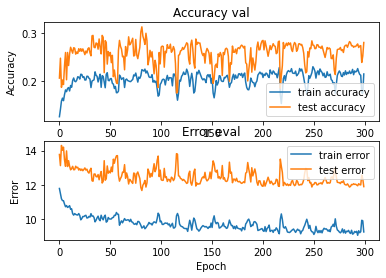

In [16]:
#Overfittng is  great problems and hinder accuracies of model.We use dropouts and regularisation to avoid overfitting. 
#Model.fit method returns history of accuracy and errors of both training and validations.
 # plot accuracy and error as a function of the epochs
plot_history(history)

In [17]:
# to remove overfitting , we make simple architechture and remove layers.Decrese no of neurons and reduce complexity.
#NO universal rule is there.
#Or do audio data augmentation.Have a large bunch of data.We artificially build new training samples by Transformations.
#WE do pitch shifting up and down,Or change speed of audio file which s a time stretch.Or add some background noise.
#We can combine all these and make bunch of new data.We augment data only the train data not test one to make test as unseen.

In [18]:
#For overfitting, we can also do early stopping.Then we can use dropouts
#DROPOUT:Its a technique to drop neurons while training and increase robustness.Or change the neurons.0.1 to 0.5 max dropoutprob .

In [19]:
#Regularisation:punish large weights.We have L1 and L2 regularisation.Add (lembda*W)L1 to the error fxn of network.
#Lembda is a parameter to optimise the network.In L2 we Add Lembda*(w)^2.We use tensor flow for this.
#Early stopping is to stop at less epochs.